# ML Project-2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Customer-Churn.csv")

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [9]:
df.drop("customerID",axis=1,inplace=True)

In [10]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [11]:
gen1=np.array(df["gender"].unique())
gen2=np.array(df["gender"])
gen1

array(['Female', 'Male'], dtype=object)

In [12]:
#Female - 0
#Male - 1

for i in range(len(gen2)):
    if(gen2[i]=="Female"):
        gen2[i]=0
    elif(gen2[i]=="Male"):
        gen2[i]=1
print(gen2)
df["gender"]=gen2

[0 1 1 ... 0 1 1]


In [14]:
li=np.array(["Partner","Dependents","PhoneService","PaperlessBilling","Churn"])
li1=[]
for i in range(len(li)):
    li1.append(np.array(df[li[i]]))

In [15]:
li1

[array(['Yes', 'No', 'No', ..., 'Yes', 'Yes', 'No'], dtype=object),
 array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object),
 array(['No', 'Yes', 'Yes', ..., 'No', 'Yes', 'Yes'], dtype=object),
 array(['Yes', 'No', 'Yes', ..., 'Yes', 'Yes', 'Yes'], dtype=object),
 array(['No', 'No', 'Yes', ..., 'No', 'Yes', 'No'], dtype=object)]

In [16]:
#No - 0
#Yes - 1
for i in range(len(li1)):
    for j in range(len(li1[i])):
        if(li1[i][j]=="No"):
            li1[i][j]=0
        elif(li1[i][j]=="Yes"):
            li1[i][j]=1
for i in range(len(li)):
    df[li[i]]=li1[i]

In [17]:
ml1=np.array(df["MultipleLines"].unique())
ml2=np.array(df["MultipleLines"])
ml1

array(['No phone service', 'No', 'Yes'], dtype=object)

In [18]:
#No - 0
#Yes - 1
#No phone service -2

for i in range(len(ml2)):
        if(ml2[i]=="No"):
            ml2[i]=0
        elif(ml2[i]=="Yes"):
            ml2[i]=1
        elif(ml2[i]=="No phone service"):
            ml2[i]=2
df["MultipleLines"]=ml2

In [19]:
is1=np.array(df["InternetService"].unique())
is2=np.array(df["InternetService"])
is1

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [20]:
#No - 0
#DSL - 1
#Fiber optic -2

for i in range(len(is2)):
        if(is2[i]=="No"):
            is2[i]=0
        elif(is2[i]=="DSL"):
            is2[i]=1
        elif(is2[i]=="Fiber optic"):
            is2[i]=2
df["InternetService"]=is2

In [21]:
li=np.array(["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"])
li1=[]
for i in range(len(li)):
    print(np.array(df[li[i]].unique()))
    li1.append(np.array(df[li[i]]))
li1

['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']


[array(['No', 'Yes', 'Yes', ..., 'Yes', 'No', 'Yes'], dtype=object),
 array(['Yes', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object),
 array(['No', 'Yes', 'No', ..., 'No', 'No', 'Yes'], dtype=object),
 array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object),
 array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object),
 array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)]

In [22]:
#No - 0
#Yes - 1
#No internet service -2
for i in range(len(li1)):
    for j in range(len(li1[i])):
        if(li1[i][j]=="No"):
            li1[i][j]=0
        elif(li1[i][j]=="Yes"):
            li1[i][j]=1
        elif(li1[i][j]=="No internet service"):
            li1[i][j]=2
for i in range(len(li)):
    df[li[i]]=li1[i]

In [23]:
con1=np.array(df["Contract"].unique())
con2=np.array(df["Contract"])
con1

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [24]:
#Month-to-month - 0 
#One year - 1
#Two year - 2
for i in range(len(con2)):
        if(con2[i]=="Month-to-month"):
            con2[i]=0
        elif(con2[i]=="One year"):
            con2[i]=1
        elif(con2[i]=="Two year"):
            con2[i]=2
df["Contract"]=con2

In [25]:
pm1=np.array(df["PaymentMethod"].unique())
pm2=np.array(df["PaymentMethod"])
pm1

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [26]:
#Electronic check - 0 
#Mailed check - 1
#Bank transfer (automatic) - 2
#Credit card (automatic) - 3
for i in range(len(pm2)):
        if(pm2[i]=="Electronic check"):
            pm2[i]=0
        elif(pm2[i]=="Mailed check"):
            pm2[i]=1
        elif(pm2[i]=="Bank transfer (automatic)"):
            pm2[i]=2
        elif(pm2[i]=="Credit card (automatic)"):
            pm2[i]=3
df["PaymentMethod"]=pm2

In [27]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.5,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,2,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,1,84.80,1990.5,0
7039,0,0,1,1,72,1,1,2,0,1,1,0,1,1,1,1,3,103.20,7362.9,0
7040,0,0,1,1,11,0,2,1,1,0,0,0,0,0,0,1,0,29.60,346.45,0
7041,1,1,1,0,4,1,1,2,0,0,0,0,0,0,0,1,1,74.40,306.6,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [29]:
arr=np.array(df.columns)
arr

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [30]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df['TotalCharges']=df['TotalCharges'].astype(float)
me=df['TotalCharges'].mean()
df['TotalCharges'].fillna(me,inplace=True)

In [31]:
for i in range(len(arr)):
    df[arr[i]]=df[arr[i]].astype(float)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   float64
 1   SeniorCitizen     7043 non-null   float64
 2   Partner           7043 non-null   float64
 3   Dependents        7043 non-null   float64
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   float64
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   float64
 16  PaymentMethod     7043 non-null   float64


In [33]:
# Module: Preprocess
def preprocess_data(df):
    train_size = int(0.8 * len(df))
    train_data = df.iloc[:train_size]
    test_data = df.iloc[train_size:]
    
    return train_data, test_data

In [34]:
def create_mini_batches(X, y, batch_size=32):
    mini_batches = []
    data = np.hstack((X, y.reshape(-1,1)))
    np.random.shuffle(data)
    
    num_batches = data.shape[0] // batch_size
    
    for i in range(num_batches):
        mini_batch = data[i * batch_size:(i + 1) * batch_size, :]
        X_mini = mini_batch[:, :-1]
        y_mini = mini_batch[:, -1].reshape(-1,1)
        mini_batches.append((X_mini, y_mini))
    
    if data.shape[0] % batch_size != 0:
        mini_batch = data[num_batches * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        y_mini = mini_batch[:, -1].reshape(-1,1)
        mini_batches.append((X_mini, y_mini))
    
    return mini_batches

In [36]:
train_data, test_data = preprocess_data(df)

# Extract features and target
X_train = train_data.drop(columns=["Churn"]).values
y_train = train_data["Churn"].values

X_test = test_data.drop(columns=["Churn"]).values
y_test = test_data["Churn"].values

In [37]:
X_train

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 2.9850e+01,
        2.9850e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 5.6950e+01,
        1.8895e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 5.3850e+01,
        1.0815e+02],
       ...,
       [1.0000e+00, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 2.5000e+01,
        7.8250e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.0000e+00, 2.0300e+01,
        1.1315e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 2.6350e+01,
        1.8405e+02]])

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights
        self.weights_input_hidden = self.weight_initializer(input_size, hidden_size)
        self.weights_hidden_output = self.weight_initializer(hidden_size, output_size)
        
    def weight_initializer(self, input_size, output_size):
        return np.random.uniform(low=-1, high=1, size=(input_size, output_size))
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden)
        self.hidden_output = self.sigmoid(self.hidden_input)
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output)
        self.output = self.sigmoid(self.output_input)
        
        return self.output
    
    def backward(self, X, y, learning_rate):
        error = y - self.output
        output_delta = error * self.sigmoid_derivative(self.output)
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)
        
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * learning_rate
        self.weights_input_hidden += X.T.dot(hidden_delta) * learning_rate
    
    def train(self, X, y,learning_rate):
        output = self.forward(X)
        self.backward(X, y, learning_rate)
           
    
    def predict(self, X):
        return np.round(self.forward(X))

In [40]:
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1
nn = NeuralNetwork(input_size, hidden_size, output_size)

train_acc=[]
test_acc=[]

epochs = 200
learning_rate = 0.01
mini_batches = create_mini_batches(X_train, y_train)

for j in range(epochs):
    for X_mini, y_mini in mini_batches:
        nn.train(X_mini, y_mini, learning_rate)
    if(j%10==0):
        train_pre1 = nn.predict(X_train)     
        test_pre1 = nn.predict(X_test)
        acc_train=accuracy_score(train_pre1,y_train)
        acc_test=accuracy_score(test_pre1,y_test)
        train_acc.append(100*acc_train)
        test_acc.append(100*acc_test)
        
print(train_acc)       
print(test_acc)

train_pre = nn.predict(X_train)     
test_pre = nn.predict(X_test)

/tmp/ipykernel_3896/497278201.py:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_3896/497278201.py:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_3896/497278201.py:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_3896/497278201.py:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_3896/497278201.py:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_3896/497278201.py:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_3896/497278201.py:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_3896/497278201.py:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_3896/497278201.py:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/

[76.0915867944622, 76.10933617323393, 76.0915867944622, 76.0915867944622, 76.28682996095137, 76.0915867944622, 76.3400780972666, 76.3045793397231, 76.25133120340789, 76.25133120340789, 76.2158324458644, 76.19808306709265, 76.32232871849484, 76.37557685481008, 76.25133120340789, 76.25133120340789, 76.2158324458644, 76.26908058217963, 76.26908058217963, 76.25133120340789]
[76.86302342086586, 76.86302342086586, 76.93399574166075, 76.79205110007096, 76.93399574166075, 76.93399574166075, 77.07594038325053, 76.86302342086586, 76.86302342086586, 76.86302342086586, 76.86302342086586, 76.79205110007096, 77.00496806245565, 77.00496806245565, 77.00496806245565, 77.00496806245565, 77.00496806245565, 77.00496806245565, 77.00496806245565, 77.00496806245565]


/tmp/ipykernel_3896/497278201.py:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [41]:
i1=0
i2=0

for j in range(len(train_pre)):
    if(train_pre[j]==0):
        i1=i1+1
print(i1)
for j in range(len(y_train)):
    if(y_train[j]==0):
        i2=i2+1
print(i2)

5302
4146


In [42]:
i1=0
i2=0

for j in range(len(test_pre)):
    if(test_pre[j]==0):
        i1=i1+1
print(i1)
for j in range(len(y_test)):
    if(y_test[j]==0):
        i2=i2+1
print(i2)



1322
1028


In [43]:
accuracy_train = accuracy_score(train_pre,y_train )
print("Accuracy of train in %:", accuracy_train*100)
accuracy_test = accuracy_score(test_pre,y_test )
print("Accuracy of test in %:", accuracy_test*100)

Accuracy of train in %: 76.25133120340789
Accuracy of test in %: 77.00496806245565


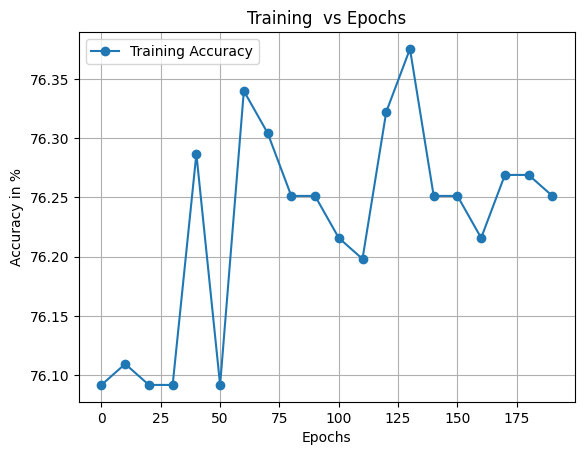

In [44]:
epochs = range(0, len(train_acc) * 10, 10)

plt.plot(epochs, train_acc, label='Training Accuracy', marker='o')


plt.title('Training  vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy in %')
plt.legend()
plt.grid(True)
plt.show()


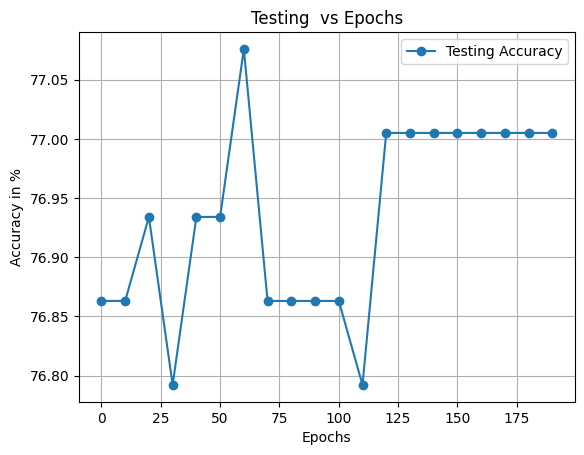

In [45]:
epochs = range(0, len(test_acc) * 10, 10)

plt.plot(epochs, test_acc, label='Testing Accuracy', marker='o')


plt.title('Testing  vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy in %')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
class ANN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, num_epochs=200):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        
        self.weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
        self.bias_input_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
        self.bias_hidden_output = np.zeros((1, output_size))
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def softmax(self, x):
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_values / np.sum(exp_values, axis=1, keepdims=True)
    
    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_input_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)
        self.output = self.softmax(np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_hidden_output)
        return self.output
    
    def backward(self, X, y):
        output_error = self.output - y
        hidden_error = np.dot(output_error, self.weights_hidden_output.T) * (self.hidden_output * (1 - self.hidden_output))
        
        d_weights_hidden_output = np.dot(self.hidden_output.T, output_error)
        d_bias_hidden_output = np.sum(output_error, axis=0, keepdims=True)
        d_weights_input_hidden = np.dot(X.T, hidden_error)
        d_bias_input_hidden = np.sum(hidden_error, axis=0, keepdims=True)
        
        self.weights_hidden_output -= self.learning_rate * d_weights_hidden_output
        self.bias_hidden_output -= self.learning_rate * d_bias_hidden_output
        self.weights_input_hidden -= self.learning_rate * d_weights_input_hidden
        self.bias_input_hidden -= self.learning_rate * d_bias_input_hidden
        
    def train(self, X_train, y_train):
        for epoch in range(self.num_epochs):
            output = self.forward(X_train)
            self.backward(X_train, y_train)
            
    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)



In [61]:
input_size = len(df.columns) - 1
hidden_size = 32
output_size = 2

nn = ANN(input_size, hidden_size, output_size)
X_train = train_data.drop(columns=["Churn"]).values
y_train = pd.get_dummies(train_data["Churn"]).values  
nn.train(X_train, y_train)

X_test = test_data.drop(columns=["Churn"]).values
y_test = pd.get_dummies(test_data["Churn"]).values  
predictions = nn.predict(X_test)



/tmp/ipykernel_3896/3536762557.py:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_3896/3536762557.py:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [62]:
print("Train Accuracy in %:", accuracy_train*100)
print("Test Accuracy in %:", accuracy_test*100)

Train Accuracy in %: 76.25133120340789
Test Accuracy in %: 77.00496806245565


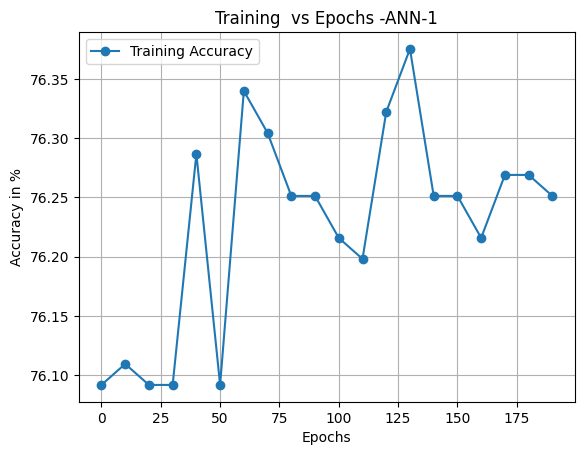

In [53]:
epochs = range(0, len(train_acc) * 10, 10)

plt.plot(epochs, train_acc, label='Training Accuracy', marker='o')


plt.title('Training  vs Epochs -ANN-1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy in %')
plt.legend()
plt.grid(True)
plt.show()

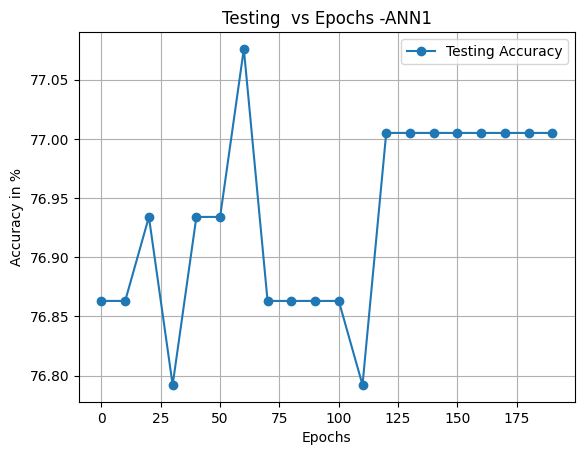

In [54]:
epochs = range(0, len(test_acc) * 10, 10)

plt.plot(epochs, test_acc, label='Testing Accuracy', marker='o')


plt.title('Testing  vs Epochs -ANN1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy in %')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
class ANN2:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, learning_rate=0.01, num_epochs=200):
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        
        # Initialize weights
        self.weights_input_hidden1 = np.random.uniform(low=-1, high=1, size=(input_size, hidden_size1))
        self.weights_hidden1_hidden2 = np.random.uniform(low=-1, high=1, size=(hidden_size1, hidden_size2))
        self.weights_hidden2_output = np.random.uniform(low=-1, high=1, size=(hidden_size2, output_size))
        
    def relu(self, x):
        return np.maximum(0, x)
    
    def softmax(self, x):
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_values / np.sum(exp_values, axis=1, keepdims=True)
    
    def forward(self, X):
        hidden1_input = np.dot(X, self.weights_input_hidden1)
        self.hidden1_output = self.relu(hidden1_input)
        hidden2_input = np.dot(self.hidden1_output, self.weights_hidden1_hidden2)
        self.hidden2_output = self.relu(hidden2_input)
        output_input = np.dot(self.hidden2_output, self.weights_hidden2_output)
        output = self.softmax(output_input)
        return output
    
    def backward(self, X, y, output):
        output_error = output - y
        d_weights_hidden2_output = np.dot(self.hidden2_output.T, output_error)

        hidden2_error = np.dot(output_error, self.weights_hidden2_output.T) * (self.hidden2_output > 0)
        d_weights_hidden1_hidden2 = np.dot(self.hidden1_output.T, hidden2_error)

        hidden1_error = np.dot(hidden2_error, self.weights_hidden1_hidden2.T) * (self.hidden1_output > 0)
        d_weights_input_hidden1 = np.dot(X.T, hidden1_error)
        
        self.weights_hidden2_output -= self.learning_rate * d_weights_hidden2_output
        self.weights_hidden1_hidden2 -= self.learning_rate * d_weights_hidden1_hidden2
        self.weights_input_hidden1 -= self.learning_rate * d_weights_input_hidden1
        
    def fit(self, X_train, y_train, batch_size=32):
        for epoch in range(self.num_epochs):
            train_data = pd.concat([X_train, y_train], axis=1).sample(frac=1).reset_index(drop=True)
            
            for batch_start in range(0, len(train_data), batch_size):
                batch_data = train_data.iloc[batch_start:batch_start+batch_size]
                X_batch = batch_data.drop(columns='Churn').values
                y_batch = np.zeros((len(batch_data), self.output_size))
                
                output = self.forward(X_batch)
                self.backward(X_batch, y_batch, output)

    def predict(self, X_test):
        predictions = []
        for index, row in X_test.iterrows():
            X = row.values.reshape(1, -1)
            output = self.forward(X)
            prediction = np.argmax(output)
            predictions.append(prediction)
        return predictions


In [56]:
train_size = int(0.8 * len(df))
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [58]:
X_train = train_data.drop(columns=["Churn"])
y_train = train_data[["Churn"]]
X_test = test_data.drop(columns=["Churn"])
y_test = test_data[["Churn"]]


input_size = X_train.shape[1]
hidden_size1 = 64
hidden_size2 = 32
output_size = 2  
learning_rate = 0.01
num_epochs = 200


ann = ANN2(input_size, hidden_size1, hidden_size2, output_size, learning_rate, num_epochs)
ann.fit(X_train, y_train)

pre_y=ann.predict(X_test)
accuracy=accuracy_score(pre_y,y_test)
print("Accuracy in %:",accuracy*100)

/tmp/ipykernel_3896/2619525611.py:19: RuntimeWarning: invalid value encountered in subtract
  exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))


Accuracy in %: 72.95954577714691
